In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [206]:
df.shape

(5572, 5)

In [207]:
# PROJECT OUTLINE:

# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [208]:
# checking missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [210]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [212]:
df.sample(5)

,v1,v2
1478,ham,I think its far more than that but find out. C...
2243,ham,Boo I'm on my way to my moms. She's making tor...
4935,ham,K..k.:)congratulation ..
779,ham,That means get the door
2638,ham,Am in gobi arts college


In [213]:
# Renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [214]:
df.sample(5)

,target,text
208,ham,You please give us connection today itself bef...
5223,ham,If I die I want u to have all my stuffs.
4540,ham,Hiya. How was last night? I've been naughty an...
2237,ham,"Give her something to drink, if she takes it a..."
4874,ham,I know dat feelin had it with Pete! Wuld get w...


In [215]:
from sklearn.preprocessing import LabelEncoder

# Converting target columns values into numbers
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [216]:
# Now check for duplicate values
df.duplicated().sum()

np.int64(403)

In [217]:
# Removing duplicate values
df = df.drop_duplicates(keep='first')

In [218]:
df.duplicated().sum()

np.int64(0)

In [219]:
df.shape

(5169, 2)

## 2. EDA

In [220]:
df.value_counts()

target  text                                                                                                                                        
1       we tried to contact you re your response to our offer of a new nokia fone and camcorder hit reply or call 08000930705 for delivery              1
        network operator. The service is free. For T & C's visit 80488.biz                                                                              1
        money!!! you r a lucky winner ! 2 claim your prize text money 2 88600 over å£1million to give away ! ppt150x3+normal text rate box403 w1t1jy    1
        lyricalladie(21/F) is inviting you to be her friend. Reply YES-910 or NO-910. See her: www.SMS.ac/u/hmmross STOP? Send STOP FRND to 62468       1
        it to 80488. Your 500 free text messages are valid until 31 December 2005.                                                                      1
                                                                                 

In [221]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

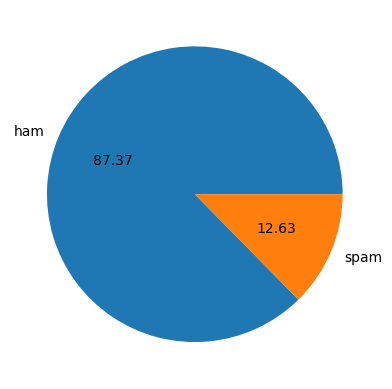

In [222]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [223]:
import nltk

In [224]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [225]:
# Number of characters in a sentence
df['num_of_characters'] = df['text'].apply(len)

In [226]:
# Number of words in a sentence
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [227]:
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [228]:
df['num_of_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [229]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [230]:
df[['num_of_characters', 'num_of_words', 'num_of_sentence']].describe()

,num_of_characters,num_of_words,num_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [231]:
# describe function for ham
df[df['target']==0][['num_of_characters', 'num_of_words', 'num_of_sentence']].describe()

,num_of_characters,num_of_words,num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [232]:
# describe function for spam
df[df['target']==1][['num_of_characters', 'num_of_words', 'num_of_sentence']].describe()

,num_of_characters,num_of_words,num_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


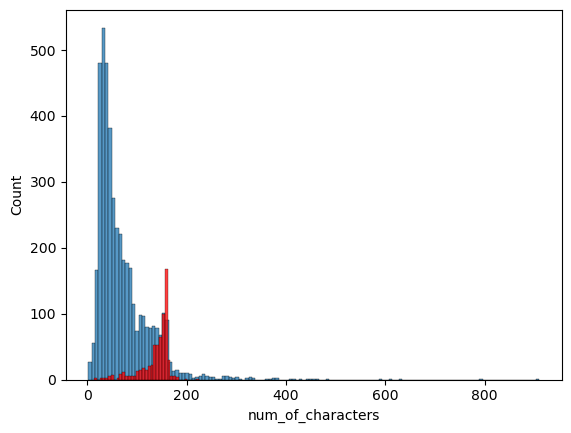

In [233]:
sns.histplot(df[df['target']==0]['num_of_characters'])
sns.histplot(df[df['target']==1]['num_of_characters'], color='red')
plt.show()

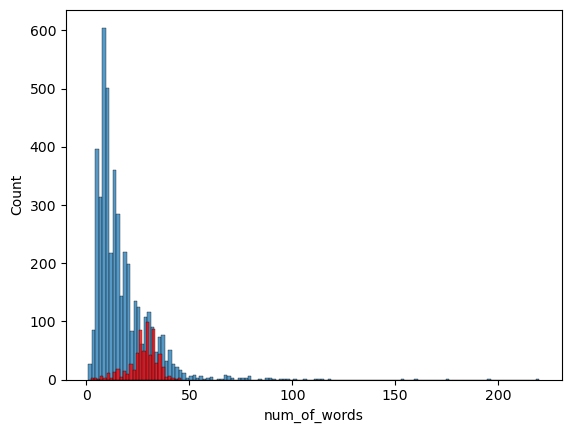

In [234]:
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'], color='red')
plt.show()

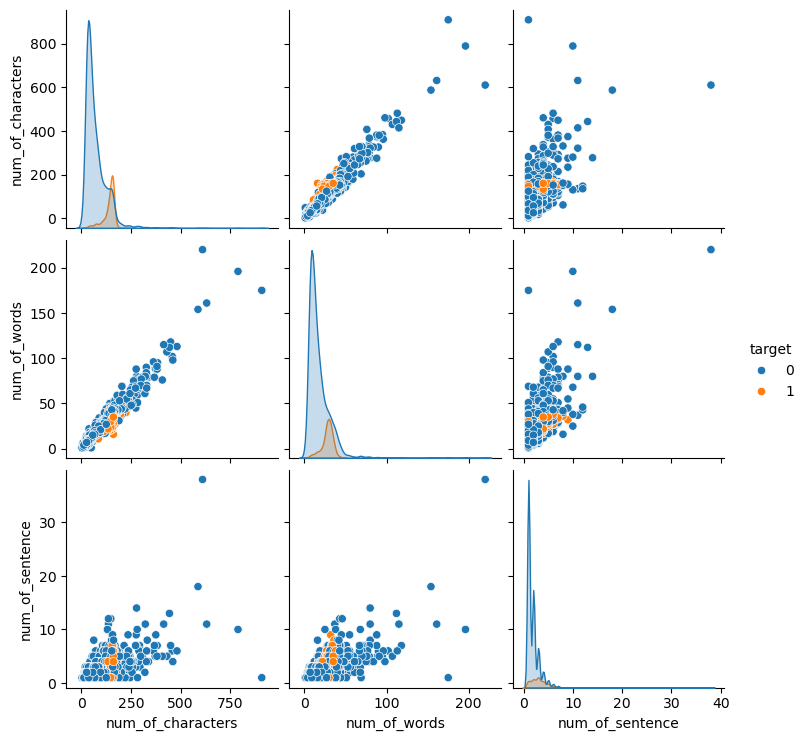

In [235]:
sns.pairplot(df, hue='target')

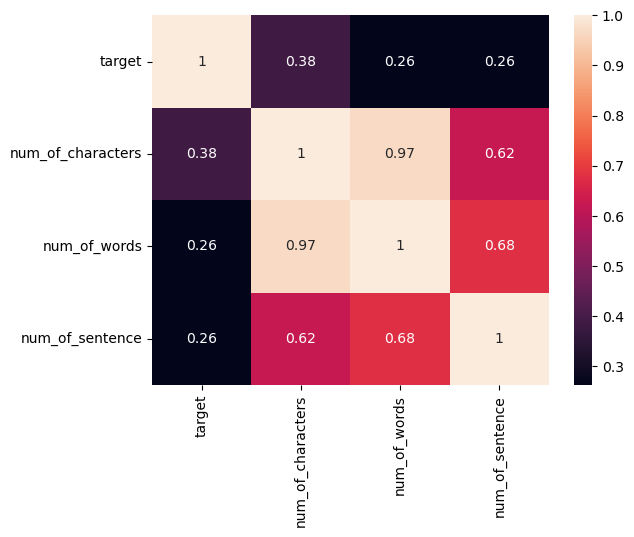

In [236]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

## 3. Text Preprocessing

In [237]:
import nltk
import string
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [239]:
stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

df['transformed_text'] = df['text'].apply(transform_text)


In [240]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [241]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [242]:
df['text'] = df['text'].astype(str)

In [243]:
spam_text = df.loc[df['target'] == 1, 'text'].str.cat(sep=' ')

spam_wordcloud = wc.generate(spam_text)


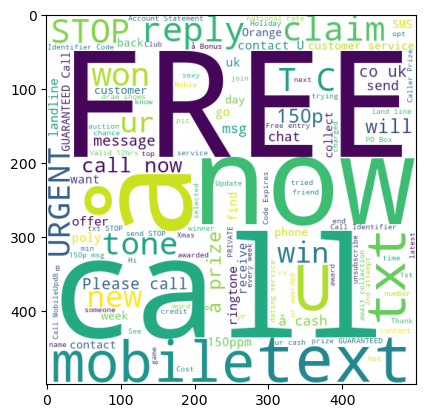

In [244]:
plt.imshow(spam_wordcloud)

In [245]:
ham_text = df.loc[df['target'] == 0, 'text'].str.cat(sep=' ')

ham_wordcloud = wc.generate(ham_text)


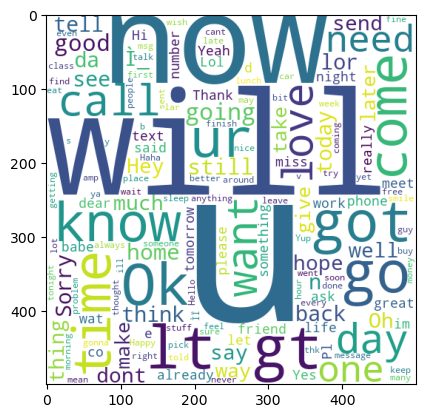

In [246]:
plt.imshow(ham_wordcloud)

In [247]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [248]:
spam_corpus = []
for msg in df[df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [249]:
len(spam_corpus)

15464

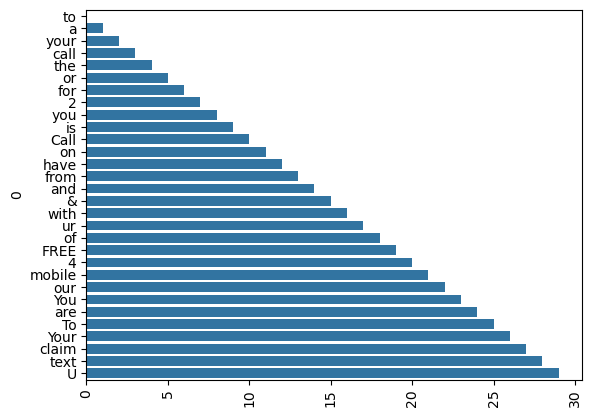

In [250]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [251]:
ham_corpus = []
for msg in df[df['target']==0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [252]:
len(ham_corpus)

63832

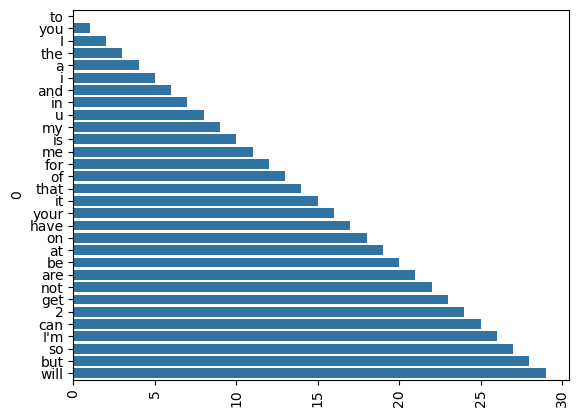

In [253]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, r2_score, classification_report, precision_score, recall_score

In [255]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.20, random_state=42)

### CountVectorizer

In [256]:
# Vectorize text with Bow CountVectorizer
bow_vectorizer = CountVectorizer()

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


In [257]:
# Model Training with Multinomial Naive Bayes with BagofWords CountVectorizer
mnb_model = MultinomialNB()
mnb_model.fit(X_train_bow, y_train)
pred_bow_mnb = mnb_model.predict(X_test_bow)

In [258]:
print("Model Evaluation Metrics (Bag of Words + Multinomial Naive Bayes)")
print(f"Accuracy  : {round(accuracy_score(y_test, pred_bow_mnb), 4)}")
print(f"Precision : {round(precision_score(y_test, pred_bow_mnb), 4)}")
print(f"Recall    : {round(recall_score(y_test, pred_bow_mnb), 4)}")

print("\nClassification Report:")
print(classification_report(y_test, pred_bow_mnb))

Model Evaluation Metrics (Bag of Words + Multinomial Naive Bayes)
Accuracy  : 0.9855
Precision : 0.9851
Recall    : 0.9103

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [259]:
# Model Training with GaussianNB Naive Bayes with BagofWords CountVectorizer
gnb_model = GaussianNB()
X_train_dense = X_train_bow.toarray()
X_test_dense = X_test_bow.toarray()

gnb_model.fit(X_train_dense, y_train)
pred_bow_gnb = gnb_model.predict(X_test_dense)

In [260]:
print("Model Evaluation Metrics (Bag of Words + Gaussian Naive Bayes)")
print(f"Accuracy  : {round(accuracy_score(y_test, pred_bow_gnb), 4)}")
print(f"Precision : {round(precision_score(y_test, pred_bow_gnb), 4)}")
print(f"Recall    : {round(recall_score(y_test, pred_bow_gnb), 4)}")

print("\nClassification Report:")
print(classification_report(y_test, pred_bow_gnb))

Model Evaluation Metrics (Bag of Words + Gaussian Naive Bayes)
Accuracy  : 0.9062
Precision : 0.6143
Recall    : 0.8897

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       889
           1       0.61      0.89      0.73       145

    accuracy                           0.91      1034
   macro avg       0.80      0.90      0.84      1034
weighted avg       0.93      0.91      0.91      1034



In [261]:
# Model Training with BernoulliNB Naive Bayes with BagofWords CountVectorizer

bnb_model = BernoulliNB()
X_train_dense = X_train_bow.toarray()
X_test_dense = X_test_bow.toarray()

bnb_model.fit(X_train_dense, y_train)
pred_bow_bnb = bnb_model.predict(X_test_dense)

In [262]:
print("Model Evaluation Metrics (Bag of Words + BernoulliNB Naive Bayes)")
print(f"Accuracy  : {round(accuracy_score(y_test, pred_bow_bnb), 4)}")
print(f"Precision : {round(precision_score(y_test, pred_bow_bnb), 4)}")
print(f"Recall    : {round(recall_score(y_test, pred_bow_bnb), 4)}")

print("\nClassification Report:")
print(classification_report(y_test, pred_bow_bnb))

Model Evaluation Metrics (Bag of Words + BernoulliNB Naive Bayes)
Accuracy  : 0.9739
Precision : 0.9917
Recall    : 0.8207

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.82      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



### TF-IDF Vectorizer

In [263]:
# Vectorize text with Bow TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [264]:
# Model Training with Multinomial Naive Bayes with BagofWords TfidfVectorizer
mnb_tf_model = MultinomialNB()
mnb_tf_model.fit(X_train_tfidf, y_train)
pred_tfidf_mnb = mnb_tf_model.predict(X_test_tfidf)

In [265]:
print("Model Evaluation Metrics (Bag of Words (TF-IDF) + Multinomial Naive Bayes)")
print(f"Accuracy  : {round(accuracy_score(y_test, pred_tfidf_mnb), 4)}")
print(f"Precision : {round(precision_score(y_test, pred_tfidf_mnb), 4)}")
print(f"Recall    : {round(recall_score(y_test, pred_tfidf_mnb), 4)}")

print("\nClassification Report:")
print(classification_report(y_test, pred_tfidf_mnb))

Model Evaluation Metrics (Bag of Words (TF-IDF) + Multinomial Naive Bayes)
Accuracy  : 0.9768
Precision : 1.0
Recall    : 0.8345

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [266]:
# Model Training with GaussianNB Naive Bayes with BagofWords TfidfVectorizer
gnb_tf_model = GaussianNB()
X_train_dense_tf = X_train_tfidf.toarray()
X_test_dense_tf = X_test_tfidf.toarray()

In [267]:
gnb_tf_model.fit(X_train_dense_tf, y_train)
pred_tfidf_gnb = gnb_tf_model.predict(X_test_dense_tf)

In [268]:
print("Model Evaluation Metrics (Bag of Words (TF-IDF) + GaussianNB Naive Bayes)")
print(f"Accuracy  : {round(accuracy_score(y_test, pred_tfidf_gnb), 4)}")
print(f"Precision : {round(precision_score(y_test, pred_tfidf_gnb), 4)}")
print(f"Recall    : {round(recall_score(y_test, pred_tfidf_gnb), 4)}")

print("\nClassification Report:")
print(classification_report(y_test, pred_tfidf_gnb))

Model Evaluation Metrics (Bag of Words (TF-IDF) + GaussianNB Naive Bayes)
Accuracy  : 0.8801
Precision : 0.5443
Recall    : 0.8897

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       889
           1       0.54      0.89      0.68       145

    accuracy                           0.88      1034
   macro avg       0.76      0.88      0.80      1034
weighted avg       0.92      0.88      0.89      1034



In [269]:
# Model Training with BernoulliNB Naive Bayes with BagofWords TF-IDF
bnb_tf_model = BernoulliNB()
X_train_dense_tf = X_train_tfidf.toarray()
X_test_dense_tf = X_test_tfidf.toarray()

In [270]:
bnb_tf_model.fit(X_train_dense_tf, y_train)
pred_tfidf_bnb = bnb_tf_model.predict(X_test_dense_tf)

In [271]:
print("Model Evaluation Metrics (Bag of Words (TF-IDF) + BernoulliNB Naive Bayes)")
print(f"Accuracy  : {round(accuracy_score(y_test, pred_tfidf_bnb), 4)}")
print(f"Precision : {round(precision_score(y_test, pred_tfidf_bnb), 4)}")
print(f"Recall    : {round(recall_score(y_test, pred_tfidf_bnb), 4)}")

print("\nClassification Report:")
print(classification_report(y_test, pred_tfidf_bnb))

Model Evaluation Metrics (Bag of Words (TF-IDF) + BernoulliNB Naive Bayes)
Accuracy  : 0.9826
Precision : 0.9922
Recall    : 0.8828

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [272]:
models = ["MultinomialNB", "BernoulliNB", "GaussianNB"]
predictions = [pred_bow_nb, pred_bow_bnb, pred_bow_gnb]

results = []
for model_name, pred in zip(models, predictions):
    accuracy = round(accuracy_score(y_test, pred), 4)
    precision = round(precision_score(y_test, pred), 4)
    recall = round(recall_score(y_test, pred), 4)
    f1 = round(f1_score(y_test, pred), 4)
    
    results.append([model_name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

print("Naive Bayes Model Comparison (SMS Spam Dataset) with CountVectorizer")
results_df


Naive Bayes Model Comparison (SMS Spam Dataset) with CountVectorizer


,Model,Accuracy,Precision,Recall,F1-Score
0,MultinomialNB,0.9768,0.9353,0.8966,0.9155
1,BernoulliNB,0.9739,0.9917,0.8207,0.8981
2,GaussianNB,0.9062,0.6143,0.8897,0.7268


In [273]:
models = ["MultinomialNB", "BernoulliNB", "GaussianNB"]
predictions = [pred_tfidf_mnb, pred_tfidf_bnb, pred_tfidf_gnb]

results = []
for model_name, pred in zip(models, predictions):
    accuracy = round(accuracy_score(y_test, pred), 4)
    precision = round(precision_score(y_test, pred), 4)
    recall = round(recall_score(y_test, pred), 4)
    f1 = round(f1_score(y_test, pred), 4)
    
    results.append([model_name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

print("Naive Bayes Model Comparison (SMS Spam Dataset) with TF-IDF")
results_df


Naive Bayes Model Comparison (SMS Spam Dataset) with TF-IDF


,Model,Accuracy,Precision,Recall,F1-Score
0,MultinomialNB,0.9768,1.0000,0.8345,0.9098
1,BernoulliNB,0.9826,0.9922,0.8828,0.9343
2,GaussianNB,0.8801,0.5443,0.8897,0.6754


In [274]:
# At this time my Multinomail NB model with TF-IDF gives precision of 1 and this is very good.

In [275]:
import pickle

pickle.dump(tfidf_vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb_tf_model, open('model.pkl', 'wb'))
